In [1]:
!pip install python-dotenv

In [2]:
!pip install langchain
!pip install langgraph

In [3]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.0.7
    Uninstalling langchain-core-1.0.7:
      Successfully uninstalled langchain-core-1.0.7


In [4]:
!pip install langchain_community langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00

In [5]:
from dotenv import load_dotenv
import os
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, ToolMessage
from operator import add as add_messages
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_core.tools import tool

In [6]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.5/329.5 kB 7.0 MB/s eta 0:00:00


In [8]:
from google.colab import userdata
load_dotenv()

# Get the API key from environment variables
#openai_api_key = userdata.get("OPENAI_API_KEY")
openai_api_key = ""

if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found in environment variables. Please set it in your .env file or as a secret.")

llm = ChatOpenAI(
    api_key=openai_api_key,
    model="gpt-4o",
    temperature = 0
) # I want to minimize hallucination - temperature = 0 makes the model output more deterministic

# Our Embedding Model - has to also be compatible with the LLM
embeddings = OpenAIEmbeddings(
    api_key=openai_api_key,
    model="text-embedding-3-small",
)


pdf_path = "/content/sample_data/Stock_Market_Performance_2024.pdf"


# Safety measure I have put for debugging purposes :)
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"PDF file not found: {pdf_path}")

pdf_loader = PyPDFLoader(pdf_path) # This loads the PDF

# Checks if the PDF is there
try:
    pages = pdf_loader.load()
    print(f"PDF has been loaded and has {len(pages)} pages")
except Exception as e:
    print(f"Error loading PDF: {e}")
    raise

ValueError: OPENAI_API_KEY not found in environment variables. Please set it in your .env file or as a secret.

In [7]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


In [15]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
import os

load_dotenv()

# Get the API key from Colab secrets
google_api_key = userdata.get("GEMINI_API_KEY1")

if not google_api_key:
    raise ValueError("GEMINI_API_KEY1 not found in environment variables. Please set it in your Colab secrets.")

# Set the API key as an environment variable for consistent authentication
os.environ["GOOGLE_API_KEY"] = google_api_key

llm = ChatGoogleGenerativeAI(
    api_key=google_api_key,
    model="gemini-pro", # You can choose a different Gemini model if needed
    temperature=0
)

# Our Embedding Model - has to also be compatible with the LLM
embeddings = GoogleGenerativeAIEmbeddings(
    api_key=google_api_key,
    model="models/embedding-001", # You can choose a different Gemini embedding model if needed
)


pdf_path = "/content/sample_data/Stock_Market_Performance_2024.pdf"


# Safety measure I have put for debugging purposes :)
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"PDF file not found: {pdf_path}")

pdf_loader = PyPDFLoader(pdf_path) # This loads the PDF

# Checks if the PDF is there
try:
    pages = pdf_loader.load()
    print(f"PDF has been loaded and has {len(pages)} pages")
except Exception as e:
    print(f"Error loading PDF: {e}")
    raise

PDF has been loaded and has 9 pages


In [16]:
# openai_api_key = "" # Removed as it's not needed for Gemini
# Chunking Process
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)


pages_split = text_splitter.split_documents(pages) # We now apply this to our pages

persist_directory = r"/content/sample_data_chroma/" # Changed to a different directory name
collection_name = "stock_market"

# If our collection does not exist in the directory, we create using the os command
if not os.path.exists(persist_directory):
    os.makedirs(persist_directory)


try:
    # Here, we actually create the chroma database using our embeddigns model
    vectorstore = Chroma.from_documents(
        documents=pages_split,
        embedding=embeddings,
        persist_directory=persist_directory,
        collection_name=collection_name
    )
    print(f"Created ChromaDB vector store!")

except Exception as e:
    print(f"Error setting up ChromaDB: {str(e)}")
    raise


# Now we create our retriever
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 5}
)

Error setting up ChromaDB: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerPr

GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerProjectPerModel-FreeTier"
}
]

In [17]:
!pip install huggingface_hub sentence-transformers

In [39]:
from google.colab import userdata
from langchain_community.llms import HuggingFaceHub
from langchain_community.embeddings import HuggingFaceEmbeddings
import os

load_dotenv()

# Get the API key from Colab secrets
hf_api_key = userdata.get("HUGGING_FACE_API_KEY1")

if not hf_api_key:
    raise ValueError("HUGGING_FACE_API_KEY1 not found in environment variables. Please set it in your Colab secrets.")

# Set the API key as an environment variable for consistent authentication
os.environ["HUGGINGFACEHUB_API_TOKEN"] = hf_api_key

# Initialize the Hugging Face LLM
# You can choose a different Hugging Face model suitable for chat if needed.
# For example, 'google/flan-t5-xxl' is a good general-purpose text generation model.
# Note: Not all HuggingFaceHub models support the same 'temperature' or 'max_length' parameters
# in the same way as ChatOpenAI or ChatGoogleGenerativeAI.
llm = HuggingFaceHub(
    repo_id="google/flan-t5-xxl", # A suitable model for text generation
    huggingfacehub_api_token=hf_api_key,
    task="text2text-generation", # Specify the task for the model
    model_kwargs={"temperature": 0.1, "max_length": 500} # Adjust as needed for the chosen model
)

# Our Embedding Model - has to also be compatible with the LLM
# 'sentence-transformers/all-MiniLM-L6-v2' is a commonly used and efficient embedding model.
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

pdf_path = "/content/sample_data/Stock_Market_Performance_2024.pdf"


# Safety measure I have put for debugging purposes :)
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"PDF file not found: {pdf_path}")

pdf_loader = PyPDFLoader(pdf_path) # This loads the PDF

# Checks if the PDF is there
try:
    pages = pdf_loader.load()
    print(f"PDF has been loaded and has {len(pages)} pages")
except Exception as e:
    print(f"Error loading PDF: {e}")
    raise

PDF has been loaded and has 9 pages


In [40]:
# Chunking
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
pages_split = text_splitter.split_documents(pages)

# Vectorstore
persist_directory = r"/content/sample_data_chroma_hf/"
if not os.path.exists(persist_directory):
    os.makedirs(persist_directory)

vectorstore = Chroma.from_documents(
    documents=pages_split,
    embedding=embeddings,
    persist_directory=persist_directory,
    collection_name="stock_market_hf"
)

retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

Created ChromaDB vector store!


In [44]:
@tool
def retriever_tool(query: str) -> str:
    """
    Useful for answering questions about the Stock Market Performance 2024 document.
    Input should be a specific question string.
    """
    docs = retriever.invoke(query)
    return "\n\n".join([d.page_content for d in docs])

tools = [retriever_tool]

NameError: name 'HuggingFaceEndpoint' is not defined

In [57]:
from langchain_huggingface import HuggingFaceEndpoint
# Flan-T5 is too weak for agents. Mistral-7B-Instruct is excellent and free on HF Hub.
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.3",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)


ModuleNotFoundError: No module named 'langchain_huggingface'

In [49]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


def should_continue(state: AgentState):
    """Check if the last message contains tool calls."""
    result = state['messages'][-1]
    return hasattr(result, 'tool_calls') and len(result.tool_calls) > 0

In [50]:
system_prompt = """
You are an intelligent AI assistant who answers questions about Stock Market Performance in 2024 based on the PDF document loaded into your knowledge base.
Use the retriever tool available to answer questions about the stock market performance data. You can make multiple calls if needed.
If you need to look up some information before asking a follow up question, you are allowed to do that!
Please always cite the specific parts of the documents you use in your answers.
"""


tools_dict = {our_tool.name: our_tool for our_tool in tools} # Creating a dictionary of our tools

# LLM Agent
def call_llm(state: AgentState) -> AgentState:
    """Function to call the LLM with the current state."""
    messages = list(state['messages'])
    messages = [SystemMessage(content=system_prompt)] + messages
    message = llm.invoke(messages)
    return {'messages': [message]}

In [51]:
# Retriever Agent
def take_action(state: AgentState) -> AgentState:
    """Execute tool calls from the LLM's response."""

    tool_calls = state['messages'][-1].tool_calls
    results = []
    for t in tool_calls:
        print(f"Calling Tool: {t['name']} with query: {t['args'].get('query', 'No query provided')}")

        if not t['name'] in tools_dict: # Checks if a valid tool is present
            print(f"\nTool: {t['name']} does not exist.")
            result = "Incorrect Tool Name, Please Retry and Select tool from List of Available tools."

        else:
            result = tools_dict[t['name']].invoke(t['args'].get('query', ''))
            print(f"Result length: {len(str(result))}")


        # Appends the Tool Message
        results.append(ToolMessage(tool_call_id=t['id'], name=t['name'], content=str(result)))

    print("Tools Execution Complete. Back to the model!")
    return {'messages': results}

In [52]:
graph = StateGraph(AgentState)
graph.add_node("llm", call_llm)
graph.add_node("retriever_agent", take_action)

graph.add_conditional_edges(
    "llm",
    should_continue,
    {True: "retriever_agent", False: END}
)
graph.add_edge("retriever_agent", "llm")
graph.set_entry_point("llm")

rag_agent = graph.compile()


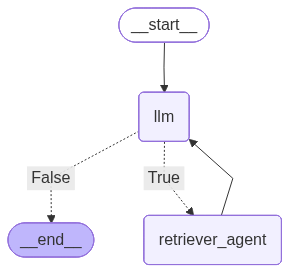

In [53]:
from IPython.display import Image, display
display(Image(rag_agent.get_graph().draw_mermaid_png()))

In [54]:
def running_agent():
    print("\n=== RAG AGENT===")

    while True:
        user_input = input("\nWhat is your question: ")
        if user_input.lower() in ['exit', 'quit']:
            break

        messages = [HumanMessage(content=user_input)] # converts back to a HumanMessage type

        result = rag_agent.invoke({"messages": messages})

        print("\n=== ANSWER ===")
        print(result['messages'][-1].content)




In [56]:
running_agent()


=== RAG AGENT===

What is your question: who is narendra modi


AttributeError: 'InferenceClient' object has no attribute 'post'